# Исследование игровых продуктов

**Объект исследования** 
- исторические данные о продажах компьютерных игр в интернет-магазине «Стримчик», а так же об оценках пользователей и экспертов, жанрах и платформах, доступные из открытых источников.

**Цель исследования**
- выявить закономерности, определяющие успешность игры, для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План выполнение проекта:**

**1. Загрузка данных и изучение общей информации.**

**2. Подготовка данных.**
- Заменить названия столбцов (приведите к нижнему регистру).
- Преобразовать данные в нужные типы.
- Обработать пропуски при необходимости.
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

**3. Исследовательский анализ данных.**
- Посмотреть, сколько игр выпускалось в разные годы, определить, важны ли данные за все периоды.
- Посмотреть, как менялись продажи по платформам; выбрать платформы с наибольшими суммарными продажами и построить распределение по годам; определить, за какой характерный срок появляются новые и исчезают старые платформы.
- Выбрать данные за соответствующий актуальный период; актуальный период определить в результате исследования предыдущих вопросов.
- Не учитывать в работе данные за предыдущие годы.
- Определить, какие платформы лидируют по продажам, растут или падают; выбрать несколько потенциально прибыльных платформ.
- Построть график «ящик с усами» по глобальным продажам игр в разбивке по платформам, описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков; построить диаграмму рассеяния и посчитть корреляцию между отзывами и продажами; сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам; выяснить, что можно сказать о самых прибыльных жанрах, выделяются ли жанры с высокими и низкими продажами.

**4. Портрет пользователя каждого региона.**

Определить для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5), описать различия в долях продаж;
- самые популярные жанры (топ-5), пояснить разницу,
- влияет ли рейтинг ESRB на продажи в отдельном регионе.

**5. Проверка гипотез.**
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**6. Общий вывод.**

## Загрузка данных и изучение общей информации 

In [1]:
# Импортирую библиотеки.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from scipy import stats as st

In [2]:
warnings.simplefilter("ignore")

In [3]:
# Открываю файл.
data = pd.read_csv('/datasets/games.csv')

In [4]:
# Посмотрю данные пяти первых и пяти последних строк.
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
# Посмотрю общую информацию о данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание данных:**

В датафрейме 11 столбцов и 16715 строк. 

**Name** — название игры.

**Platform** — платформа.

**Year_of_Release** — год выпуска.

**Genre** — жанр игры. 

**NA_sales** — продажи в Северной Америке (миллионы проданных копий).

**EU_sales** — продажи в Европе (миллионы проданных копий).

**JP_sales** — продажи в Японии (миллионы проданных копий).

**Other_sales** — продажи в других странах (миллионы проданных копий).

**Critic_Score** — оценка критиков (максимум 100).

**User_Score** — оценка пользователей (максимум 10). 

**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board, эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию).

**Выявленные проблемы в данных:**
- названия всех столбцов имеют некорректный вид; 
- наличие пропусков в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating;
- неверный тип данных в столбцах: Year_of_Release, User_Score.

## Предобработка данных

### Замена названий столбцов

In [6]:
# Привожу названия столбцов к нижнему регистру.
data.columns = data.columns.str.lower()

In [7]:
# Проверяю результат.
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Названия столбцов преобразованы к надлежащему виду.** 

### Обработка пропусков

In [8]:
# Нахожу количество пропущенных значений в каждом столбце.
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбцах *name* и *genre* - по 2 прпуска, в столбце *year_of_release* - 269 пропусков. Такие пропуски могли возникнуть из-за ошибки при загрузке данных. Заполнение их какими-то недостоверными данными может исказить результаты исследования. Учитывая небольшое количество пропусков, считаю возможным удалить эти строки. Но прежде чем удалять пропущенные значения, проверю информацию о них: число пропусков составляет 1,6% всех значений, среднее и медианное количество продаж на уровне среднего и медианного значений всего датасета. Следовательно удаление этих пропущенных значений не исказит результаты исследования. Затем удалю пропущенные значения одной строкой.

In [14]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
data[data['year_of_release'].isna()].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


In [16]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [17]:
# Удаляю пропуски в столбцах name, year_of_release, genre.
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

Прежде чем обрабатывать пропуски в столбцах *user_score*, *critic_score* и *rating* посмотрю на перечень их уникальных значений.

In [18]:
# Вывожу уникальные значения столбца user_score. 
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [19]:
# Сосчитаю, сколько раз встречается значение 'tbd'.
data.query('user_score == "tbd"')['user_score'].count()

2376

В столбце *user_score* 2376 раз встречается значение 'tbd' — To Be Determined, то есть «Будет определено». Это означает, что рейтинг данной игры не определен. По сути это то же, что и nan. Количество этих значений, как и количество пропусков слишком велико, чтобы можно было их удалить. Поэтому заменю значения 'tbd' на nan, так как nan принадлежит к типу данных float и с ним можно производить математические операции, и не буду удалять.

In [20]:
# Заменяю 'tbd' на nan.
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [21]:
# Вывожу уникальные значения столбца rating. 
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Возрастные категории по ESRB:
- EC («Early childhood») — для детей младшего возраста;
- E («Everyone») — для всех, первоначально K-A ("Kids to Adults");
- E10+ («Everyone 10 and older») — для всех от 10 лет и старше;
- T («Teen») — подросткам (игра подходит для лиц от 13 лет);
- M («Mature») — для взрослых (материалы игры не подходят для лиц младше 17 лет);
- AO («Adults Only 18+») — только для взрослых (содержание игры только для взрослых старше 18 лет);
- RP («Rating Pending») — рейтинг ожидается: продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Значения 'E' и 'K-A' обозначают одну возрастную категорию. Следует заменить 'K-A' на 'E'.

In [22]:
# Заменяю все 'K-A' на 'E', а 'RP' на 'UNKNOWN'.
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].replace('RP', 'UNKNOWN')

Значения столбца *rating* принадлежат к типу object, применять к ним математические операции не потребуется. Количество пропусков слишком велико, чтобы их удалить. Для того, чтобы не исказить результаты исследования, заменю пропуски на строковое значение 'UNKNOWN'.

In [23]:
# Заменю пропущенные значения в столбце 'rating' на 'UNKNOWN'.
data['rating'] = data['rating'].fillna('UNKNOWN')

In [24]:
# Вывожу уникальные значения столбца critic_score. 
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Заполнение пропусков в столбце *critic_score* так же может исказить результаты исследования. Но при этом их количество достаточно велико, поэтому удалять их не стоит. Оставлю и эти пропуски.

In [25]:
# Проверяю результат.
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

**Пропуски в столбцах *name, year_of_release, genre* удалены, в столбце *rating* заполнены. Пропуски в столбцах *critic_score*, *user_score* не подлежат заполнению или удалению, поэтому их пришлось оставить. На мой взгляд пропуски в этих столбцах могли возникнуть по техническим причинам во время загрузки информации. Или из-за того, что это непопулярные или новые игры, по которым оценки пользователей и критиков просто отсутствуют.**   

### Преобразование типов данных

In [26]:
# Посмотрю общую информацию о данных, чтобы проверить в каких столбцах нужно изменить тип данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [27]:
# Изменяю тип данных столбца year_of_release на int.
data['year_of_release'] = data['year_of_release'].astype('int')

In [28]:
# Изменяю тип данных столбца user_score на float.
data['user_score'] = pd.to_numeric(data['user_score'])

In [29]:
# Проверяю результат.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Тип данных столбца *year_of_release* изменент на int, тип данных столбца *user_score* измененн на float.**

### Проверка данных на наличие дубликатов

Приведу значения в столбце 'name' к нижнему регистру и проверю датасет на наличие дубликатов. При наличии удалю их.        

In [30]:
data['name'] = data['name'].str.lower()

In [31]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [32]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

**В данных найден и удален один дубликат по сумме параметров.**

### Подсчет суммарных продаж во всех регионах

In [33]:
# Сохраняю сумму продаж во всех регионах в столбце total_sales.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [34]:
# Проверяю результат.
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,UNKNOWN,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,UNKNOWN,31.38


**В датафрейм добавлен столбец *total_sales*, содержащий сумму продаж во всех регионах.**

## Исследовательский анализ данных

### Изучение динамики выпуска игр по годам

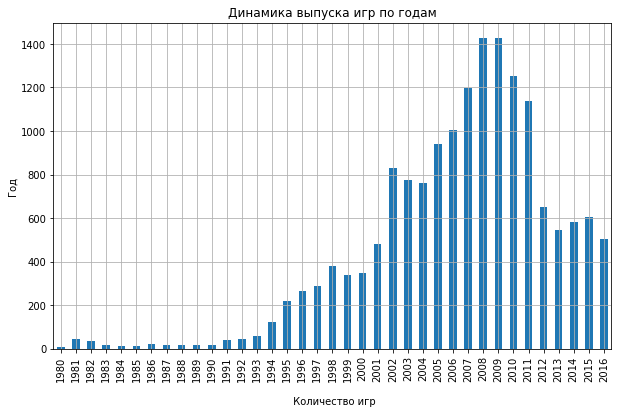

In [35]:
# Группирую данные о выпуске игр по годам и визуализирую результат. 
sales_by_year = data.pivot_table(index = ['year_of_release'], values=['name'], aggfunc='count')
sales_by_year.plot(kind='bar', legend=False, grid=True, figsize=(10, 6))
plt.title('Динамика выпуска игр по годам')
plt.xlabel('\n Количество игр')
plt.ylabel('Год');

**На графике видно, что до 1993 выпускалось мало игр. С 1994 года начался рост выпуска игр, достигший своего пика в 2008-2009 гг. Начиная с 2012 года выпуск игр значительно снизился и остановился примерно на одном уровне до 2016 года. Для того, чтобы проследить динамику продаж игр по платформам, буду использовать данные за все периоды. Для построения прогноза продаж игр на 2017 год буду использовать период с 2013 по 2015 год, т.к. этот период является наиболее близким к 2017 году, и в нем прослеживается единая тенденция по объемам выпуска игр. При этом данные за 2016 год могут быть не полными и могут исказить результаты исследования, поэтому их не буду использовать.**

### Анализ объемов продаж игр по платформам.
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

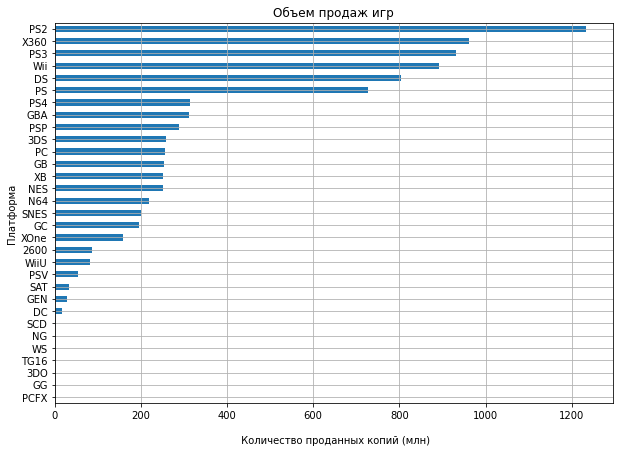

In [36]:
# Группирую данные об объемах продаж игр по платформам за все периоды и визуализирую результат.
platforms_sales = data.pivot_table(index=['platform'], values=['total_sales'], aggfunc='sum').sort_values(by='total_sales')
platforms_sales.plot(kind='barh', legend=False, figsize=(10, 7), grid=True)
plt.title('Объем продаж игр')
plt.xlabel('\n Количество проданных копий (млн)')
plt.ylabel('Платформа');

**На графике видно, что больше всего игр продано для платформы PS2. Далее в ТОП-6 по объемам продаж вошли: X360, PS3, Wii, DS, PS. По остальным платформам объемы продаж значительно ниже.**

Динамика продаж игр для платформы PS2 по годам


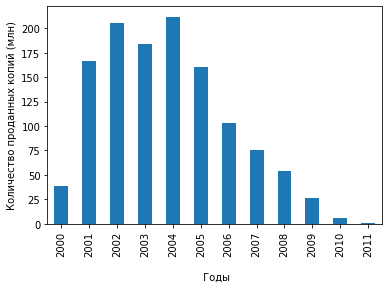

Динамика продаж игр для платформы X360 по годам


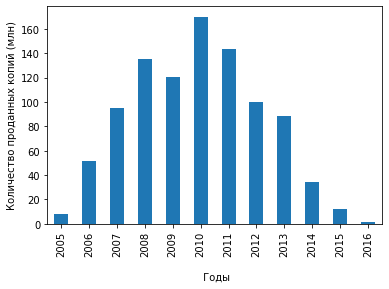

Динамика продаж игр для платформы PS3 по годам


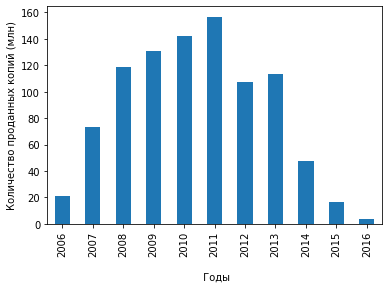

Динамика продаж игр для платформы Wii по годам


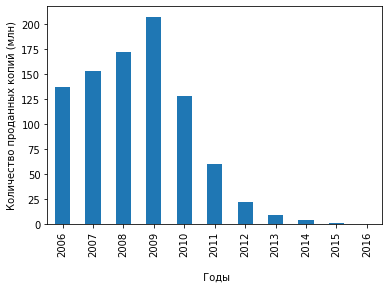

Динамика продаж игр для платформы DS по годам


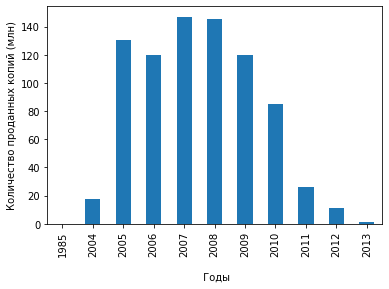

Динамика продаж игр для платформы PS по годам


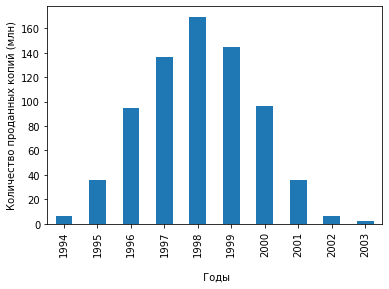

In [37]:
# Рассмотрю динамику продаж игр по годам для каждой платформы из ТОП-6.
for platform in platforms_sales.sort_values(by='total_sales', ascending=False).index[:6]:
    print('Динамика продаж игр для платформы', platform, 'по годам')
    (data
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar', legend=False)
    )
    plt.xlabel('\n Годы')
    plt.ylabel('Количество проданных копий (млн)')
    plt.show()

Проверю странное значение продаж для платформы DS в 1985 году. По данным Википедии консоль Nintendo DS (DS) была выпущена в 2004 году.      

In [38]:
data[(data['platform'] == "DS") & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,UNKNOWN,0.02


Такое значение всего 1, кроме того количество продаж по нему крайне мало. Видимо это аномалия, вызванная технической ошибкой при загрузке данных. Эту строку следует удалить.    

In [39]:
data = data.drop([15957], axis = 0)

**На графиках видно, что после выпуска платформы, продажи игр для них продолжаются 10 - 12 лет. Сначала платформы набирают популярность (наблюдается рост продаж игр), потом удерживают ее в течение примерно 4 лет, и затем их продажи снижаются. При этом все платформы из ТОП-6 уже не являются популярными: по некоторы продажи в 2015-2016 гг. крайне малы, а по некоторым вовсе отсутствуют. Поэтому стоит рассмотреть данные о продажах игр за актуальный период.**

### Выбор актуального периода для анализа

Для построения прогноза продаж игр на 2017 год буду использовать период с 2014 по 2015 год, т.к. этот период является наиболее близким к 2017 году, и в нем прослеживается единая тенденция по объемам выпуска игр. При этом данные за 2016 год могут быть не полными и могут исказить результаты исследования, поэтому их не буду использовать.

In [41]:
actual_data = data.query('2014 <= year_of_release <= 2015')

### Анализ объемов продаж игр по платформам за актуальный период

In [42]:
# Группирую данные об объемах продаж игр по платформам за все периоды и визуализирую результат.
actual_platforms_sales = (actual_data.pivot_table(index=['platform'], values=['total_sales'], aggfunc='sum')
                     .sort_values(by='total_sales')
)

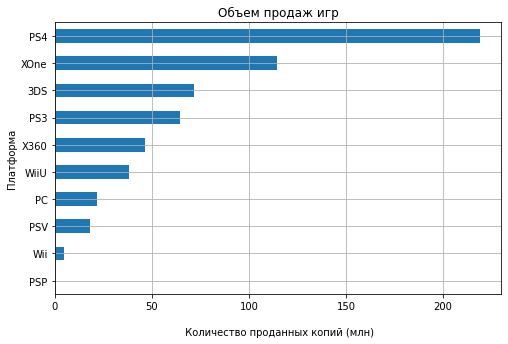

In [43]:
actual_platforms_sales.plot(kind='barh', legend=False, figsize=(8, 5), grid=True)
plt.title('Объем продаж игр')
plt.xlabel('\n Количество проданных копий (млн)')
plt.ylabel('Платформа');

**На графике видно, что больше всего игр за период с 2014 по 2015 год продано для платформы PS4. Далее в ТОП-5 по объемам продаж вошли: XOne, 3DS, PS3 и X360. Но и их продажи значительно ниже, чем у PS4.**

Динамика продаж игр для платформы PS4 по годам


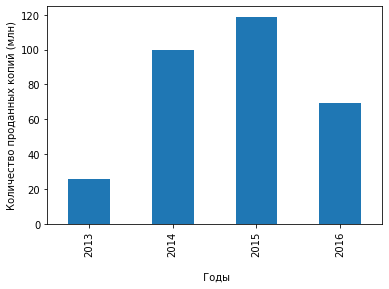

Динамика продаж игр для платформы XOne по годам


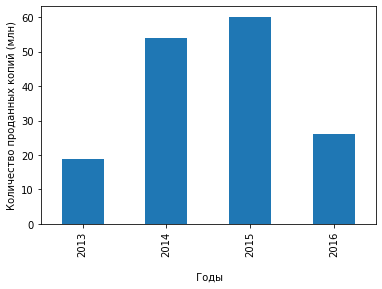

Динамика продаж игр для платформы 3DS по годам


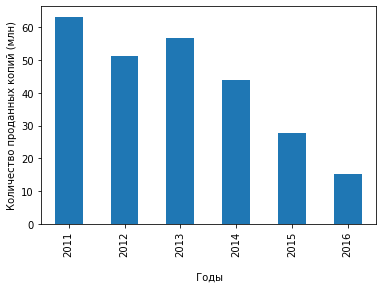

Динамика продаж игр для платформы PS3 по годам


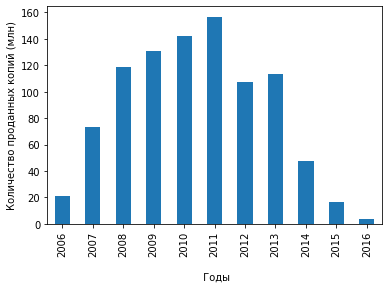

Динамика продаж игр для платформы X360 по годам


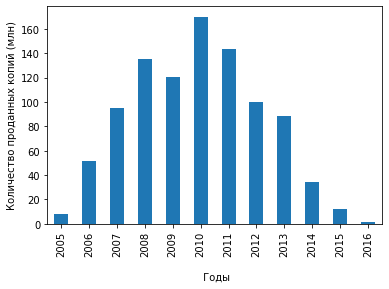

Динамика продаж игр для платформы WiiU по годам


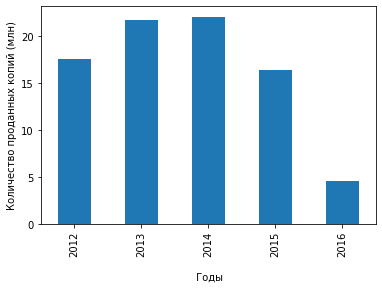

Динамика продаж игр для платформы PC по годам


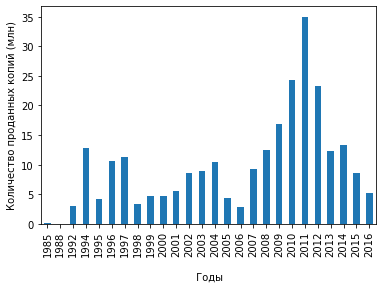

Динамика продаж игр для платформы PSV по годам


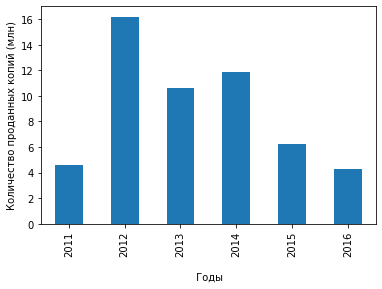

Динамика продаж игр для платформы Wii по годам


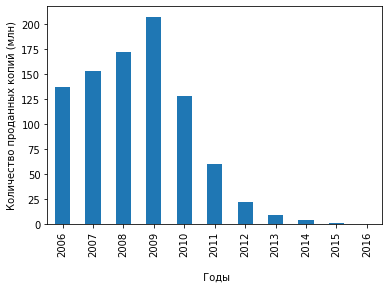

Динамика продаж игр для платформы PSP по годам


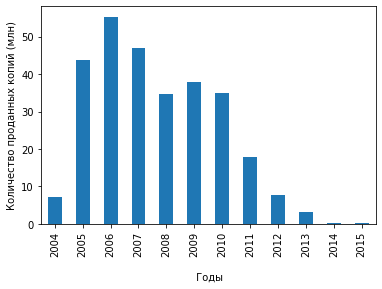

In [44]:
# Рассмотрю динамику продаж игр за все периоды платформ, которые продавались в актуальный период,
# чтобы оценить, на каком этапе своего существования они находятся.
# Возможно низкий объем продаж, связан с тем, что платформа совсем новая и пик ее популярности еще впереди.
for platform in actual_platforms_sales.sort_values(by='total_sales', ascending=False).index[:]:
    print('Динамика продаж игр для платформы', platform, 'по годам')
    (data
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar', legend=False)
    )
    plt.xlabel('\n Годы')
    plt.ylabel('Количество проданных копий (млн)')
    plt.show()

**На графиках видно, что объемы продаж по всем платформам упали в 2016 году. Это может быть связано с тем, что в декабре 2016 года еще нет полных данных за весь год. При этом для популярных в 2014-2015 гг. платформ PS3, X360 и 3DS отчетливо видно, что пик их популярности пройден. В свою очередь платформы PS4 и XOne выпущены в 2013 году, что позже всех остальных. Исходя из среднего срока продолжительности популярности платформ, можно предположить, что в 2017 году у них будет если не пик популярности, то хотя бы достаточно высокий уровень. Тем не менее прибыль можно получить даже на падающих, но по прежнему стабильных продажах. Поэтому в список потенциально прибыльных платформ можно включить все, у которых продажи за 2015 год были более 15 млн копий. Помимо PS4 и XOne это: 3DS, PS3, X360 и WiiU. Кроме того, игры для PC выпускаются и продаются более 30 лет с 1985 года по настоящее время. В 2014-2015 гг. продажи игр для PC находятся хоть и не на самом высоком, но на стабильном уровне, поэтому PC тоже стоит всключить в число потенциально прибыльных.  
<br /> Таким образом, потенциально самыми прибыльными в 2017 году можно считать следующие платформы: 
<br /> PS4, 
XOne, 
3DS, PS3, X360, WiiU и PC.**
        

### Анализ размаха продаж игр в разбивке по платформам

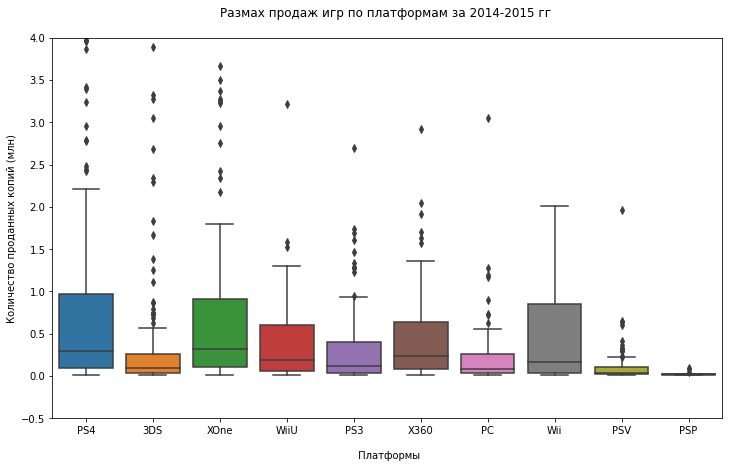

In [45]:
# Построю диаграмму размаха продаж по платформам.
plt.figure(figsize=(12, 7))
(sns.boxplot(data = actual_data, y = 'total_sales', x='platform')
    .set(title = 'Размах продаж игр по платформам за 2014-2015 гг \n', 
         xlabel = '\n Платформы', 
         ylabel = 'Количество проданных копий (млн)',
         ylim = [-0.5, 4]));

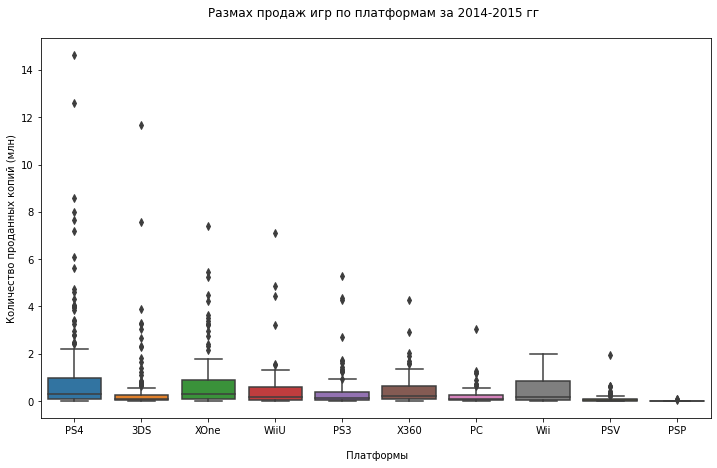

In [46]:
# Построю диаграмму размаха продаж по платформам в 100% масштабе, чтобы увидеть максимальные продажи.
plt.figure(figsize=(12, 7))
(sns.boxplot(data = actual_data, y = 'total_sales', x='platform')
    .set(title = 'Размах продаж игр по платформам за 2014-2015 гг \n', 
         xlabel = '\n Платформы', 
         ylabel = 'Количество проданных копий (млн)'));

**На графиках видно, что распределение продаж среди платформ различается в незначительной степени, медиана продаж находится примерно на одном уровне (0,2 млн проданных копий). Тем не менее, диапазон большей части значений продаж для платформ PS4 и XOne наибольший, что подтверждает то, что их можно считать самыми прибыльными. Также можно отметить достаточно высокие значения, выходящие далеко за пределы 3 квартиля у PS4, XOne и других потенциально прибылльных платформ. Вероятно, это самые продаваемые игры. Для Wii диапазон большей части значений продаж находится примерно на одном уровне с PS4 и XOne но так как для этой латформы отсутствуют такие большие выбросы, как для других, включать ее в список потенциально прибыльных не буду.**

### Анализ влияния  отзывов пользователей и критиков на продажи внутри одной популярной платформы

In [47]:
# Создаю матрицу корреляции между продажами и отзывами критиков и пользователей для платформы PS4.
PS4_data = actual_data.query('platform == "PS4"')
PS4_data_cor = PS4_data[['critic_score','user_score', 'total_sales']]
PS4_data_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.602514,0.429003
user_score,0.602514,1.000000,0.005328
total_sales,0.429003,0.005328,1.000000


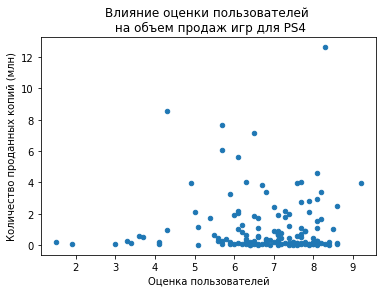

In [48]:
# Построю график зависимости объема продаж от отзывов пользователей для платформы PS4.
PS4_data.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Влияние оценки пользователей \n на объем продаж игр для PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество проданных копий (млн)');

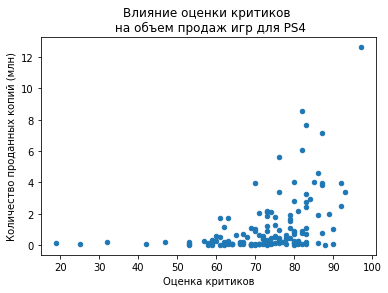

In [49]:
# Построю график зависимости объема продаж от отзывов критиков для платформы PS4.
PS4_data.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Влияние оценки критиков \n на объем продаж игр для PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество проданных копий (млн)');

**Корреляция между объемами продаж и оценками пользователей близка к нулю, значит взаимосвязь отсутсвует. Корреляция объемами продаж и оценками критиков равна 40%, то есть имеется слабая прямопропорциональная зависимость.**

In [50]:
# Создаю матрицу корреляции между продажами и отзывами критиков и пользователей для платформы XOne.
XOne_data = actual_data.query('platform == "XOne"')
XOne_data_cor = XOne_data[['critic_score','user_score', 'total_sales']]
XOne_data_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.453434,0.474138
user_score,0.453434,1.000000,-0.056546
total_sales,0.474138,-0.056546,1.000000


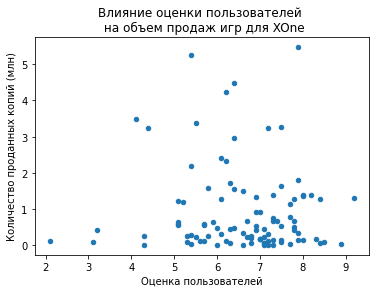

In [51]:
# Построю график зависимости объема продаж от отзывов пользователей для платформы XOne.
XOne_data.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Влияние оценки пользователей \n на объем продаж игр для XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество проданных копий (млн)');

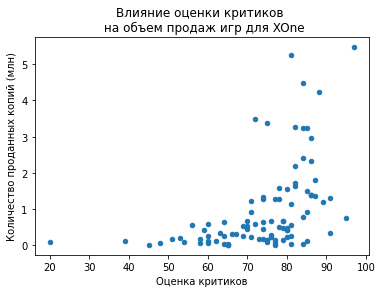

In [52]:
# Построю график зависимости объема продаж от отзывов критиков для платформы PS4.
XOne_data.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Влияние оценки критиков \n на объем продаж игр для XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество проданных копий (млн)');

**Для платформы XOne прослеживаются те же закономерности, что и для платформы PS4: взаимозвязь между оценками пользователей и объемами продаж отсутствует, имеется слабая прямопропорциональная взаимосвязь между объемами продаж и оценками критиков.**

**Учитывая, что корреляция между оценками критиков и объемами продаж не велика, кроме того на графиках видно большое количество выбрасов (то есть низкое число продаж для игр с высокой оценкой), нельзя однозначно говорить о наличии прямой взаимосвязи между объемами продаж и оценками критиков.**

### Анализ общего распределение игр по жанрам

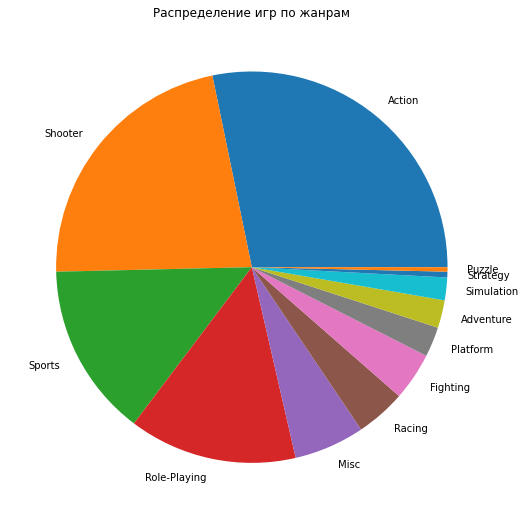

In [53]:
# Построю круговую диаграмму распределения проданных игр по жанрам за период с 2014 по 2015 гг.
(actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
            .sort_values(ascending=False, by = 'total_sales')
            .plot(kind='pie', figsize=(9,9), y= 'total_sales',  legend=False)
    )
plt.title('Распределение игр по жанрам')
plt.ylabel('');

**Из графика видно, что больше всего продаются игры жанра *Action*, следом идут *Shooter*, *Role-Playing* и *Sports*. Все остальные жанры распространены значительно меньше. Наименее прибыльные жанры - *Strategy* и *Puzzle*.**

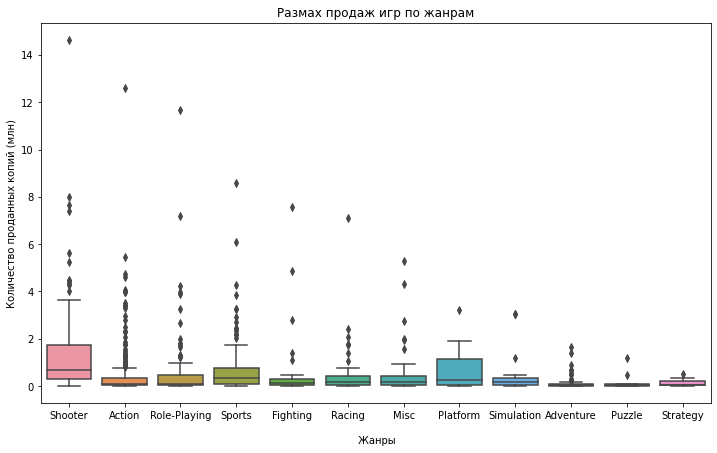

In [54]:
# Построю диаграмму размаха продаж по жанрам в обычном и увеличенном маштабе.
plt.figure(figsize=(12, 7))
(sns.boxplot(data = actual_data, y = 'total_sales', x='genre')
    .set(title = 'Размах продаж игр по жанрам', 
         xlabel = '\n Жанры', 
         ylabel = 'Количество проданных копий (млн)'));

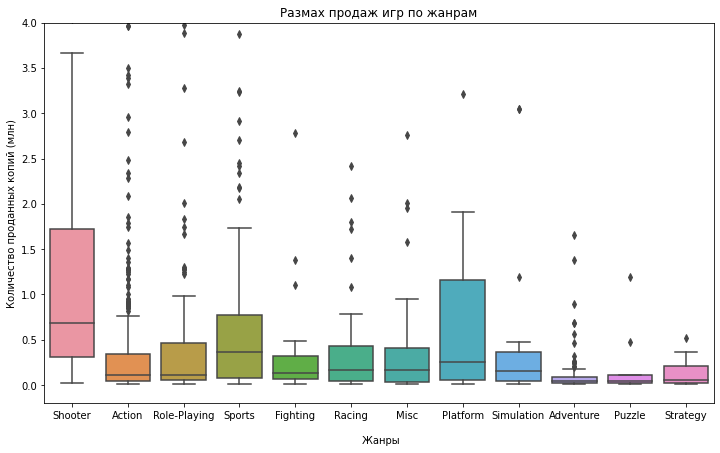

In [55]:
# Построю диаграмму размаха продаж по жанрам.
plt.figure(figsize=(12, 7))
(sns.boxplot(data = actual_data, y = 'total_sales', x='genre')
    .set(title = 'Размах продаж игр по жанрам', 
         xlabel = '\n Жанры', 
         ylabel = 'Количество проданных копий (млн)',
         ylim = [-0.2, 4]));

**На диаграммах размаха видно, что наибольший диапазон значений продаж имеют игры жанра Shooter, медианное значение продаж этого жанра превышает большинство значений продаж игр других жанров. Кроме того, выбросы (то есть небольшое число очень популярных игр) по продажам этого жанра превышают 14 млн. копий. Этот жанр можно считать наиболее стабильным. Медианное значение продаж игр других жанров находится примерно на одном уровне (примерно 0,1 - 0,4 млн копий). Но для жанров Action, Role-Playing и Sports так же характерно большое число выбрасов, значения которых превышает 6 млн копий. Жанр Platform имеет давольно большой диапазон большей части значений продаж по сравнению с другими жанрами. Но для этого жанра не характерно наличие очень популярных ирг с большим числом продаж. Таким образом наиболее популярными жанрами игр являются *Action*, *Shooter*, *Role-Playing* и *Sports*.**

## Портрет пользователя каждого региона

In [61]:
# Создаю список регионов.
regions = actual_data.columns[4:7]

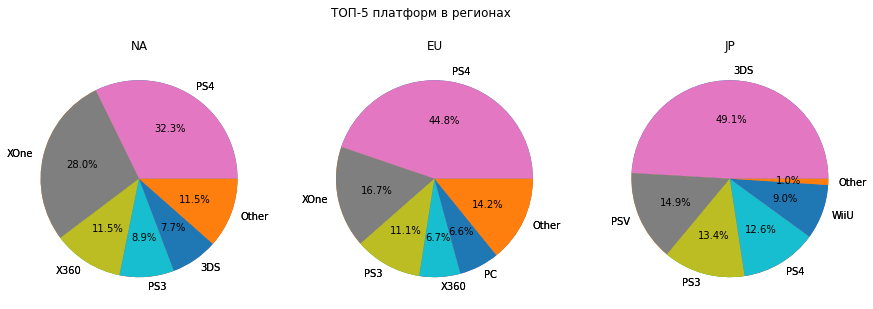

In [62]:
# Построю круговые диаграммы для каждого региона по 5 самым популярным платформам.
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
    # Группирую датафрейм по платформам для каждого региона.
    actual_data_platform_i = actual_data.groupby('platform').agg({regions[i]: 'sum'}).sort_values(by=regions[i], ascending=False)
    actual_data_platform_i.reset_index(inplace= True)
    # Выбираю ТОП-5 платформ с наибольшими продажами.
    top_sales_i = actual_data_platform_i.iloc[:5]
    # Считаю сумму продаж по остальным платформам.
    other_sales_i = actual_data_platform_i[regions[i]].iloc[5:].sum()
    # Добавляю строку с суммой продаж по остальным платформам.
    new_row = {'platform': 'Other', regions[i]: other_sales_i}
    top_sales_i = top_sales_i.append(new_row, ignore_index = True)
    # Строю круговые диаграммы.
    axs[i].pie(top_sales_i[regions[i]], labels = top_sales_i['platform'])
    axs[i].pie(top_sales_i[regions[i]], labels = top_sales_i['platform'], autopct='%1.1f%%')
    axs[i].set_title(top_sales_i.columns[1].split('_')[0].upper());

**На диаграммах можно отметить сходство Северной Америки и Европы в предпочтениях платформ: в обоих регионах на первом месте стоит платформа PS4, далее с небольшими отличиями предпочтения распределяются между XOne, X360, PS3. Замыкает ТОП-5 платформ в Америке 3DS, а в Европе - PC. В Японии другие предпочтения: самая популярная платформа - 3DS, второе место занимает PSV, далее примерно поровну предпочтения распределены между платформами PS3, PS4 и WiiU.**

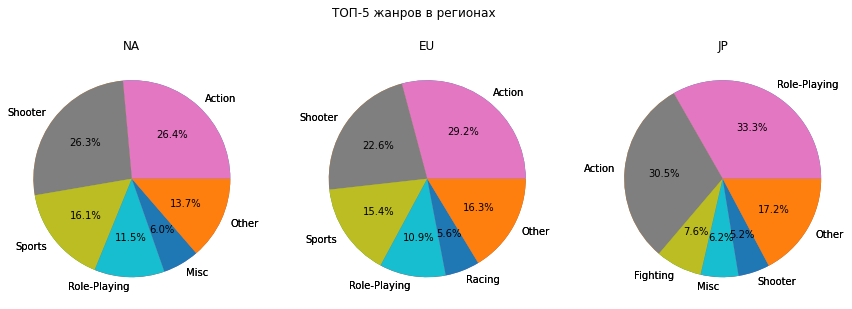

In [63]:
# Построю круговые диаграммы для каждого региона по 5 самым популярным жанрам.
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
    # Группирую датафрейм по жанрам для каждого региона.
    actual_data_genre_i = actual_data.groupby('genre').agg({regions[i]: 'sum'}).sort_values(by=regions[i], ascending=False)
    actual_data_genre_i.reset_index(inplace= True)
    # Выбираю ТОП-5 жанров с наибольшими продажами.
    top_sales_i = actual_data_genre_i.iloc[:5]
    # Считаю сумму продаж по остальным жанрам.
    other_sales_i = actual_data_genre_i[regions[i]].iloc[5:].sum()
    # Добавляю строку с суммой продаж по остальным жанрам.
    new_row = {'genre': 'Other', regions[i]: other_sales_i}
    top_sales_i = top_sales_i.append(new_row, ignore_index = True)
    # Строю круговые диаграммы.
    axs[i].pie(top_sales_i[regions[i]], labels = top_sales_i['genre'])
    axs[i].pie(top_sales_i[regions[i]], labels = top_sales_i['genre'], autopct='%1.1f%%')
    axs[i].set_title(top_sales_i.columns[1].split('_')[0].upper());

**Предпочтения по жанрам сново схожи у Америки и Европы: самый популярный жанр - Action, далее идут Shooter, Sports и Role-Playing. Замыкает ТОП-5 жанров в Америке Misc, а в Европе - Racing. В Японии самые популярные жанры - Role-Playing (33,3%) и Action (30,5%), далее идут почти в равных долях Fighting, Misc, Shooter.**

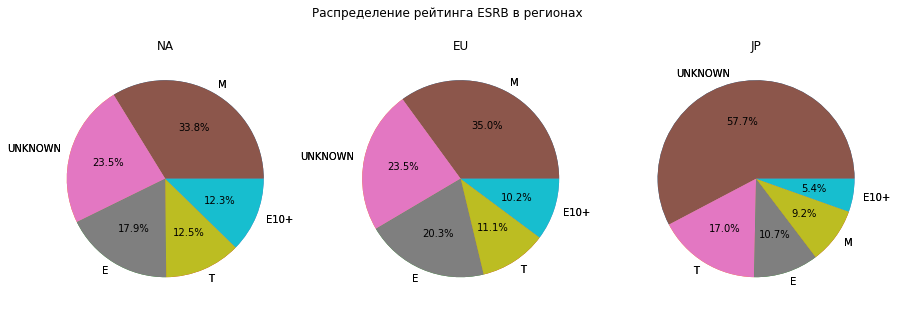

In [59]:
# Построю круговые диаграммы распределения рейтинга ESRB для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Распределение рейтинга ESRB в регионах')
for i in range(3):
    df_i = (actual_data.groupby('rating')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True))
    axs[i].pie(df_i[regions[i]], labels = df_i['rating'])
    axs[i].pie(df_i[regions[i]], labels = df_i['rating'], autopct='%1.1f%%')
    axs[i].set_title(df_i.columns[1].split('_')[0].upper());

**И в этот раз можно видеть идентичное распределение игр по возрастным категориям в Америке и Европе: на первом месте игры для лиц старше 17 лет, далее идет большой блок игр, не получивших категорию, потом идут игры для всех возрастов, игры для подростков и игры для детей от 10 лет. В Японии же более половины составляют игры без рейтинга. Вероятно, это связано с тем, что компания ESRB в основном оценивает компании из Северной Америки, а в Японии широко распространены игры местного производства.**

**Предпочтения пользователей в Северной Америке**
- Самая популярная платформа - PS4;
- Самый распространенный жанр - Action;
- Самая распространенная возрастная категория - М (для лиц старше 17 лет).

**Предпочтения пользователей в Европе**
- Самая популярная платформа - PS4;
- Самый распространенный жанр - Action;
- Самая распространенная возрастная категория - М (для лиц старше 17 лет).

**Предпочтения пользователей в Японии**
- Самая популярная платформа - 3DS;
- Самый распространенный жанр - Role-Playing;
- Самая распространенная возрастная категория - не определена.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Формулирую нулевую и альтернативную гипотезы:

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны.

H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [64]:
# Сохраняю данные о пользовательских рейтингах платформ Xbox One и PC.
xone = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > 0)]['user_score']
pc = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > 0)]['user_score']

In [65]:
# Проверяю первую гипотезу.
alpha = .05

results = st.ttest_ind(xone, pc, equal_var=False)

print('Средний пользовательский рейтинг платформы Xbox One:', xone.mean().round(1))
print('Средний пользовательский рейтинг платформы PC:', pc.mean().round(1))
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Средний пользовательский рейтинг платформы Xbox One: 6.6
Средний пользовательский рейтинг платформы PC: 6.3
p-значение: 0.2064150169331124
Не получилось отвергнуть нулевую гипотезу.


**При проверке гипотезы получилось, что p-значение равно 0.2064150169331124. Это означает что вероятность случайно получить различие между средними пользовательскими рейтингами двух платформ равна 20,6%. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами. Поэтому нельзя отвергнуть нулевую гипотезу.**

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Формулирую нулевую и альтернативную гипотезы:

H0: Средние пользовательские рейтинги жанров Action и Sports равны.

H1: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [66]:
# Сохраняю данные о пользовательских рейтингах жанров Action и Sports.
action = actual_data[(actual_data['genre'] == 'Action') &  (actual_data['user_score'] > 0)]['user_score']
sports = actual_data[(actual_data['genre'] == 'Sports') &  (actual_data['user_score'] > 0)]['user_score']

In [67]:
# Проверяю вторую гиотезу.
alpha = .05

results = st.ttest_ind(action, sports, equal_var=False)

print('Средний пользовательский рейтинг жанa Action:', action.mean().round(1))
print('Средний пользовательский рейтинг жанра Sports:', sports.mean().round(1))
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Средний пользовательский рейтинг жанa Action: 6.8
Средний пользовательский рейтинг жанра Sports: 5.1
p-значение: 5.639159825656943e-13
Отвергаем нулевую гипотезу.


**Гипотеза о том, что пользовательские рейтинги жанров Action и Sports одинаковые, отвергнута. Вероятность случайно получить различия между пользовательскими рейтингами крайне мала. То есть можно сделать вывод о значимом различии между ними.**

## Общий вывод

**В ходе исследования была проанализирована информация о продажах компьютерных игр на основе следующих данных:**
- название игры;
- платформа;
- год выпуска;
- жанр игры;
- продажи в Северной Америке;
- продажи в Европе;
- продажи в Японии;
- продажи в других странах;
- оценка критиков;
- оценка пользователей;
- рейтинг от организации ESRB.

**Были выявлены и обработаны следующие ошибки в данных:**
- названия столбцов преобразованы к надлежащему виду;
- обработаны пропущенные значения;
- удалены дубликаты;
- преобразованы типы данных;
- удалены аномалии.

**В результате проведенного исследования выявлены следующие закономерности:**

*Периоды активности рынка компьютерных игр:*
- 1980 – 1993 гг. - слабая активность;
- 1994 – 2009 гг. - рост выпуска игр;
- 2008 – 2009 гг. - пик активности;
- 2010 – 2012 гг. - спад активности;
- 2013 – 2016 гг. -  объемы выпуска игр на одном уровне.

*Самые популярные игровые платформы за весь период:*
- PS2;
- X360;
- PS3;
- Wii;
- DS;
- PS;

*Характерный срок коммерческой активности платформ* составляет примерно 10 - 12 лет. При этом период самых высоких продаж длится примерно 4 года. Исключением является PC, для которого выпускаются и продаются игры более 30 лет с 1985 года по настоящее время.
        

*Для построения прогноза продаж игр на 2017 год выбран период с 2014 по 2015 год.*

*Потенциально самыми прибыльными платформами в 2017 году можно считать:*
- PS4, 
- XOne, 
- 3DS, 
- PS3, 
- X360, 
- WiiU,
- PC.

*Самые популярные жанры игр:* 
- Action;
- Shooter; 
- Role-Playing; 
- Sports. 

*Предпочтения пользователей по регионам.*

Предпочтения пользователей в Европе и Северной Америке схожи:
- Самая популярная платформа - PS4;
- Самый распространенный жанр - Action;
- Самая распространенная возрастная категория - М (для лиц старше 17 лет).

Предпочтения пользователей в Японии:
- Самая популярная платформа - 3DS;
- Самый распространенный жанр - Role-Playing;
- Самая распространенная возрастная категория - не определена.

Взаимозвязь между оценками пользователей и объемами продаж отсутствует, о взаимосвязи между объемами продаж и оценками критиков тоже не стоит говорить.

Гипотеза о том, что пользовательские рейтинги платформ Xbox One и PC одинаковые, не отвергнута.

Гипотеза о том, что пользовательские рейтинги жанров Action и Sports одинаковые, отвергнута.
